## Interpretabilidad de modelos con SHAP

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

data = pd.read_csv('heart_attack_prediction_dataset.csv')


In [34]:
y = data['Heart Attack Risk']  # Convert from string "Yes"/"No" to binary

data[['Blood Preasure sistonic', 'Blood Preasure diastonic']] = data['Blood Pressure'].str.split('/', expand=True)
data[['Blood Preasure sistonic', 'Blood Preasure diastonic']] = data[['Blood Preasure sistonic', 'Blood Preasure diastonic']].astype(int)
data.drop(['Continent', 'Hemisphere', 'Patient ID', 'Blood Pressure', 'Heart Attack Risk', 'Country'], axis=1, inplace= True)


In [35]:
dummies = [
    'Sex',
    'Diet']

data= pd.get_dummies(data,columns=dummies,drop_first=True)

data.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood Preasure sistonic,Blood Preasure diastonic,Sex_Male,Diet_Healthy,Diet_Unhealthy
0,67,208,72,0,0,1,0,0,4.168189,0,...,261404,31.251233,286,0,6,158,88,1,0,0
1,21,389,98,1,1,1,1,1,1.813242,1,...,285768,27.194973,235,1,7,165,93,1,0,1
2,21,324,72,1,0,0,0,0,2.078353,1,...,235282,28.176571,587,4,4,174,99,0,1,0
3,84,383,73,1,1,1,0,1,9.828130,1,...,125640,36.464704,378,3,4,163,100,1,0,0
4,66,318,93,1,1,1,1,0,5.804299,1,...,160555,21.809144,231,1,5,91,88,1,0,1


In [37]:
X = data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)
# my_model = DummyClassifier(strategy='prior', random_state=123).fit(train_X, train_y)

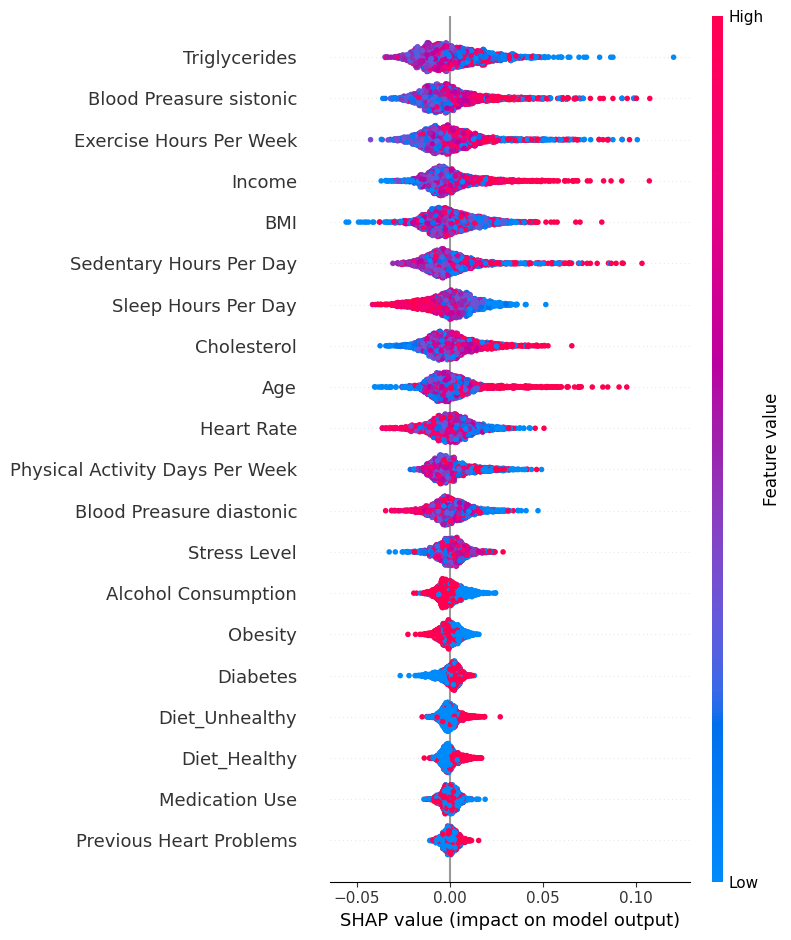

In [38]:
import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(my_model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(val_X)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], val_X)

In [39]:
row_to_show = 5
data_for_prediction = val_X.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


my_model.predict_proba(data_for_prediction_array)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names


array([[0.73, 0.27]])

In [40]:
# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction_array)

In [41]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], data_for_prediction_array)